## Observations and Insights

OBSERVATION 1:  Ramicane has a lower 25% quartile, Median, upper bound and lower bound of Last Tumor volumes than Capomulin, suggesting it may be a better alternative than Capomulin for treating squamous cell carcinoma. 

OBSERVATION 2:  There is a high correlation of mouse weight to average tumor volume, so if the mice treated with Ramicane were smaller overall than the mice treated with Capomulin, this may be what accounts for the lower final tumor volumes, rather than effectiveness of the drug. This would need to be tested and checked to ensure no faulty bias in the treatment study. 

OBSERVATION 3: Capomulin and Ramicane had a highly similar number of study data points, and together had the two highest numbers of data points, suggesting the statistics for their treatments study results are both a.) equally grounded versus each other, and b.) are likely more well grounded than other treatments due to larger testing set data. 

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [2]:
# view data to understand data source 
mouse_metadata.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
5,s508,Ramicane,Male,1,17
6,f966,Capomulin,Male,16,17
7,m546,Ramicane,Male,18,16
8,z578,Ramicane,Male,11,16
9,j913,Ramicane,Female,4,17


In [3]:
# view data to understand data source 
study_results.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
5,h246,0,45.0,0
6,p189,0,45.0,0
7,n923,0,45.0,0
8,q119,0,45.0,0
9,f993,0,45.0,0


In [4]:
# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
mouse_study_data.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Check to ensure all data was merged and no data lost 
mousecount = mouse_metadata.describe()
studycount = study_results.describe()
mousestudycount = mouse_study_data.describe()
print(mousecount)
print("----")
print(studycount)
print("----")
print(mousestudycount)

# confirmed from viewing the CSV that the mouse metadata only has 249 items 

       Age_months  Weight (g)
count  249.000000  249.000000
mean    12.730924   26.116466
std      7.228687    3.697003
min      1.000000   15.000000
25%      6.000000   25.000000
50%     13.000000   27.000000
75%     19.000000   29.000000
max     24.000000   30.000000
----
         Timepoint  Tumor Volume (mm3)  Metastatic Sites
count  1893.000000         1893.000000       1893.000000
mean     19.572108           50.448381          1.021659
std      14.079460            8.894722          1.137974
min       0.000000           22.050126          0.000000
25%       5.000000           45.000000          0.000000
50%      20.000000           48.951474          1.000000
75%      30.000000           56.292200          2.000000
max      45.000000           78.567014          4.000000
----
        Age_months   Weight (g)    Timepoint  Tumor Volume (mm3)  \
count  1893.000000  1893.000000  1893.000000         1893.000000   
mean     12.814580    25.662441    19.572108           50.448381   
std

## Summary statistics

In [6]:
# Create dataframe of only Drug regimen and Tumor volume 
drugregimen_tumorvol = mouse_study_data[["Drug Regimen","Tumor Volume (mm3)"]]

# .describe to confirm still have count of 1893
drugregimen_tumorvol.describe()

,Tumor Volume (mm3)
count,1893.000000
mean,50.448381
std,8.894722
min,22.050126
25%,45.000000
50%,48.951474
75%,56.292200
max,78.567014


In [7]:
# group by drug regimen to prepare for gathering summary stats 
grouped_regimen = drugregimen_tumorvol.groupby(["Drug Regimen"])
grouped_regimen.head(20)

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
748,Propriva,56.545519
749,Propriva,60.753925
750,Propriva,61.872274
751,Propriva,64.183229


In [8]:
# get summary statistics for each drug regimen 
avg_tumor_vol = grouped_regimen["Tumor Volume (mm3)"].mean()
median_tumor_vol = grouped_regimen["Tumor Volume (mm3)"].median()
var_tumor_vol = grouped_regimen["Tumor Volume (mm3)"].var()
sd_tumor_vol = grouped_regimen["Tumor Volume (mm3)"].std()
sem_tumor_vol = grouped_regimen["Tumor Volume (mm3)"].sem()

# print out summary statistics to confirm data
print(avg_tumor_vol)
print("------------------")
print(median_tumor_vol)
print("------------------")
print(var_tumor_vol)
print("------------------")
print(sd_tumor_vol)
print("------------------")
print(sem_tumor_vol)
print("------------------")

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
------------------
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
------------------
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
------------------
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril    

In [9]:
# convert summary stats into dataframes that can be merged 
mean_stats = pd.DataFrame(avg_tumor_vol)
med_stats = pd.DataFrame(median_tumor_vol)
var_stats = pd.DataFrame(var_tumor_vol)
sd_stats = pd.DataFrame(sd_tumor_vol)
sem_stats = pd.DataFrame(sem_tumor_vol)

# merge dataframes to create summary statistics table 
merge1 = pd.merge(mean_stats, med_stats, on="Drug Regimen")
merge2 = pd.merge(merge1, var_stats, on="Drug Regimen")
merge3 = pd.merge(merge2, sd_stats, on="Drug Regimen")
summarystats = pd.merge(merge3, sem_stats, on="Drug Regimen")
summarystats

,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Rename columns of summary statistics page 
summarystats.columns=["Mean Tumor Volume","Median Tumor Volume", "Variance of Tumor Volume",
                      "Standard Dev of Tumor Volume","SEM of Tumor Volume"]                                           
summarystats

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Dev of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

In [12]:
# Generate dataset for data points of each treatment 
treatment_counts = mouse_study_data["Drug Regimen"].value_counts()
treatment_counts

treatment_counts = pd.DataFrame(treatment_counts)

treatment_counts = treatment_counts.sort_values("Drug Regimen")
treatment_counts

,Drug Regimen
Propriva,161
Ceftamin,178
Infubinol,178
Placebo,181
Stelasyn,181
Zoniferol,182
Naftisol,186
Ketapril,188
Ramicane,228
Capomulin,230


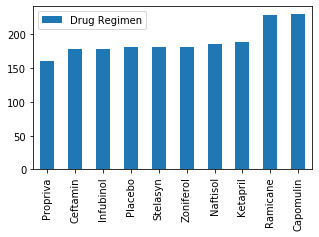

In [13]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatment_counts.plot(kind="bar", figsize=(5,3))
plt.show()

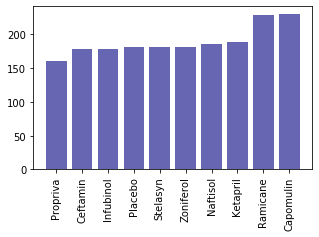

In [14]:
# Set x axis and tick locations
x_axis = np.arange(len(treatment_counts))
tick_locations = [value for value in x_axis]

# Create treatment list for labels for x axis, ordered based on sorted order of treatment names 
treatment_list = ["Propriva", "Ceftamin", "Infubinol","Placebo","Stelasyn","Zoniferol","Naftisol","Ketapril","Ramicane",
                 "Capomulin"]

# Create bar chart using treatment_counts and x_axis
plt.figure(figsize=(5,3))
plt.bar(x_axis, treatment_counts["Drug Regimen"], color='navy', alpha=0.6, align="center")
plt.xticks(tick_locations, treatment_list, rotation="vertical")
plt.show()

## Pie plots

In [15]:
# Calculate number of male and female 
sexcount = mouse_metadata["Sex"].value_counts()
sexcount

Male      125
Female    124
Name: Sex, dtype: int64

In [16]:
# create dataframe of male and female count for referencing 
malefemale = [{"Gender": "Male", "Count": "125"},
                {"Gender": "Female", "Count": "124"}]

malefemale = pd.DataFrame(malefemale)
malefemale

,Gender,Count
0,Male,125
1,Female,124


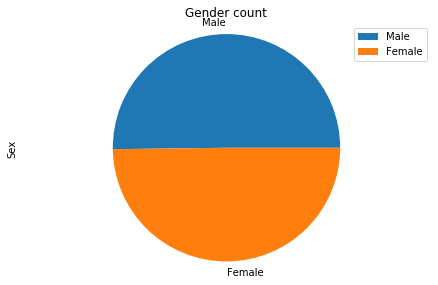

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

genders = malefemale["Count"]

sexcount.plot(kind="pie", y=genders, title = "Gender count", legend = True)
plt.tight_layout()
plt.axis("equal")
plt.show()

In [18]:
# generate individual value for male count
male_group = mouse_study_data.groupby(['Sex']).get_group(('Male'))
male_count = len(male_group['Mouse ID'].unique())
print(male_count)

125


In [19]:
# generate individual value for female count
female_group = mouse_study_data.groupby(['Sex']).get_group(('Female'))
female_count = len(female_group['Mouse ID'].unique())
print(female_count)

124


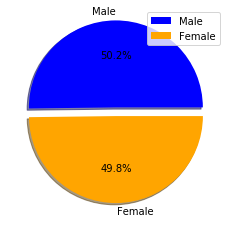

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels, values for each section, colors, explode seperation, and pie chart plotting 
labels = ["Male", "Female"]
sizes = [male_count, female_count]
colors = ["blue", "orange"]
explode = (0.1, 0,)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.legend(loc="upper right")
plt.show()



## Quartiles, outliers and boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Per Readme: best treatments are Capomulin, Ramicane, Infubinol, and Ceftamin

In [22]:
# create a dataframe for each of the 4 best treatments 

Capomulin = mouse_study_data.loc[(mouse_study_data["Drug Regimen"] == "Capomulin"), :] 
Ramicane = mouse_study_data.loc[(mouse_study_data["Drug Regimen"] == "Ramicane"), :]
Infubinol = mouse_study_data.loc[(mouse_study_data["Drug Regimen"] == "Infubinol"), :]
Ceftamin = mouse_study_data.loc[(mouse_study_data["Drug Regimen"] == "Ceftamin"), :]

# Calculate final tumor volumes for each drug's dataframe

Capomulin_final_tumor = Capomulin.groupby(["Drug Regimen","Mouse ID"]).last()
Ramicane_final_tumor = Ramicane.groupby(["Drug Regimen","Mouse ID"]).last()
Infubinol_final_tumor = Infubinol.groupby(["Drug Regimen","Mouse ID"]).last()
Ceftamin_final_tumor = Ceftamin.groupby(["Drug Regimen","Mouse ID"]).last()

print(Capomulin_final_tumor)
print(Ramicane_final_tumor)
print(Infubinol_final_tumor)
print(Ceftamin_final_tumor)

                          Sex  Age_months  Weight (g)  Timepoint  \
Drug Regimen Mouse ID                                              
Capomulin    b128      Female           9          22         45   
             b742        Male           7          21         45   
             f966        Male          16          17         20   
             g288        Male           3          19         45   
             g316      Female          22          22         45   
             i557      Female           1          24         45   
             i738      Female          23          20         45   
             j119      Female           7          23         45   
             j246      Female          21          21         35   
             l509        Male          17          21         45   
             l897        Male          17          19         45   
             m601        Male          22          17         45   
             m957      Female           3       

In [23]:
# calculate quartiles, IQR and outlier bounds for top Drug Regimens

In [24]:
# Capomulin calculations: ----------

Capomulin_volumes = Capomulin_final_tumor['Tumor Volume (mm3)']
Capomulin_quartiles = Capomulin_volumes.quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq

print("Capomulin Results:")
print(f"The lower quartile of tumor volumes is: {Capomulin_lowerq}")
print(f"The upper quartile of tumor volumes is: {Capomulin_upperq}")
print(f"The interquartile range of tumor volumes is: {Capomulin_iqr}")
print(f"The the median of tumor volumes is: {Capomulin_quartiles[0.5]} ")

Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upperq + (1.5*Capomulin_iqr)
print(f"Values below {Capomulin_lower_bound} could be outliers.")
print(f"Values above {Capomulin_upper_bound} could be outliers.")
print(" ")

# Ramicane calculations: ----------

Ramicane_volumes = Ramicane_final_tumor['Tumor Volume (mm3)'] 
Ramicane_quartiles = Ramicane_volumes.quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq-Ramicane_lowerq

print("Ramicane Results:")
print(f"The lower quartile of tumor volumes is: {Ramicane_lowerq}")
print(f"The upper quartile of tumor volumes is: {Ramicane_upperq}")
print(f"The interquartile range of tumor volumes is: {Ramicane_iqr}")
print(f"The the median of tumor volumes is: {Ramicane_quartiles[0.5]} ")

Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr)
print(f"Values below {Ramicane_lower_bound} could be outliers.")
print(f"Values above {Ramicane_upper_bound} could be outliers.")
print(" ")

# Infubinol calculations: ----------

Infubinol_volumes = Infubinol_final_tumor['Tumor Volume (mm3)'] 
Infubinol_quartiles = Infubinol_volumes.quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq-Infubinol_lowerq

print("Infubinol Results:")
print(f"The lower quartile of tumor volumes is: {Infubinol_lowerq}")
print(f"The upper quartile of tumor volumes is: {Infubinol_upperq}")
print(f"The interquartile range of tumor volumes is: {Infubinol_iqr}")
print(f"The the median of tumor volumes is: {Infubinol_quartiles[0.5]} ")

Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr)
print(f"Values below {Infubinol_lower_bound} could be outliers.")
print(f"Values above {Infubinol_upper_bound} could be outliers.")
print(" ")

# Ceftamin calculations: ----------

Ceftamin_volumes = Ceftamin_final_tumor['Tumor Volume (mm3)'] 
Ceftamin_quartiles = Ceftamin_volumes.quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq-Ceftamin_lowerq

print("Ceftamin Results:")
print(f"The lower quartile of tumor volumes is: {Ceftamin_lowerq}")
print(f"The upper quartile of tumor volumes is: {Ceftamin_upperq}")
print(f"The interquartile range of tumor volumes is: {Ceftamin_iqr}")
print(f"The the median of tumor volumes is: {Ceftamin_quartiles[0.5]} ")

Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)
print(f"Values below {Ceftamin_lower_bound} could be outliers.")
print(f"Values above {Ceftamin_upper_bound} could be outliers.")

Capomulin Results:
The lower quartile of tumor volumes is: 32.37735684
The upper quartile of tumor volumes is: 40.1592203
The interquartile range of tumor volumes is: 7.781863460000004
The the median of tumor volumes is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
 
Ramicane Results:
The lower quartile of tumor volumes is: 31.56046955
The upper quartile of tumor volumes is: 40.65900627
The interquartile range of tumor volumes is: 9.098536719999998
The the median of tumor volumes is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
 
Infubinol Results:
The lower quartile of tumor volumes is: 54.04860769
The upper quartile of tumor volumes is: 65.52574285
The interquartile range of tumor volumes is: 11.477135160000003
The the median of tumor volumes is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outlie

In [25]:
# Quantitatively determine if there are any potential outliers across all four treatment regimens

In [26]:
# Capomulin outliers: ----------
Capomulin_outliers = Capomulin_final_tumor.loc[(Capomulin_final_tumor["Tumor Volume (mm3)"] < Capomulin_lower_bound) |
                                           (Capomulin_final_tumor["Tumor Volume (mm3)"] > Capomulin_upper_bound)]

print(f"There are {len(Capomulin_outliers)} potential Capomulin outliers. They are:  {Capomulin_outliers}")
print("")


# Ramicane outliers: ----------
Ramicane_outliers = Ramicane_final_tumor.loc[(Ramicane_final_tumor["Tumor Volume (mm3)"] < Ramicane_lower_bound) |
                                           (Ramicane_final_tumor["Tumor Volume (mm3)"] > Ramicane_upper_bound)]

print(f"There are {len(Ramicane_outliers)} potential Ramicane outliers. They are:  {Ramicane_outliers}")
print("")


# Infubinol outliers: ----------
Infubinol_outliers = Infubinol_final_tumor.loc[(Infubinol_final_tumor["Tumor Volume (mm3)"] < Infubinol_lower_bound) |
                                           (Infubinol_final_tumor["Tumor Volume (mm3)"] > Infubinol_upper_bound)]

print(f"There are {len(Infubinol_outliers)} potential Infubinol outliers. They are:  {Infubinol_outliers}")
print("")


# Ceftamin outliers: ----------
Ceftamin_outliers = Ceftamin_final_tumor.loc[(Ceftamin_final_tumor["Tumor Volume (mm3)"] < Ceftamin_lower_bound) |
                                           (Ceftamin_final_tumor["Tumor Volume (mm3)"] > Ceftamin_upper_bound)]

print(f"There are {len(Ceftamin_outliers)} potential Ceftamin outliers. They are: {Ceftamin_outliers}")
print("")


There are 0 potential Capomulin outliers. They are:  Empty DataFrame
Columns: [Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []

There are 0 potential Ramicane outliers. They are:  Empty DataFrame
Columns: [Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []

There are 1 potential Infubinol outliers. They are:                            Sex  Age_months  Weight (g)  Timepoint  \
Drug Regimen Mouse ID                                              
Infubinol    c326      Female          18          25          5   

                       Tumor Volume (mm3)  Metastatic Sites  
Drug Regimen Mouse ID                                        
Infubinol    c326               36.321346                 0  

There are 0 potential Ceftamin outliers. They are: Empty DataFrame
Columns: [Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []



In [27]:
# Chart box and whisker plot for Tumor Volumes for each Drug 

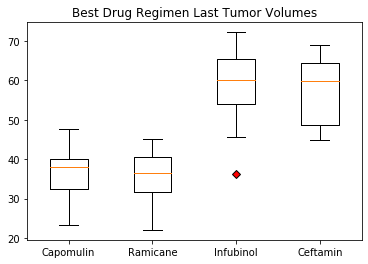

In [28]:
# All four box plots within same figure  
data = [Capomulin_volumes, Ramicane_volumes, Infubinol_volumes, Ceftamin_volumes]
red_diamond = dict(markerfacecolor='r', marker='D')
fig7, ax7 = plt.subplots()
ax7.set_title('Best Drug Regimen Last Tumor Volumes')
ax7.boxplot(data, flierprops=red_diamond, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and scatter plots

In [35]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [36]:
# Create dataframe for a single mouse
m957 = mouse_study_data.loc[(mouse_study_data["Mouse ID"] == "m957"), :]
m957

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
135,m957,Capomulin,Female,3,19,0,45.000000,0
136,m957,Capomulin,Female,3,19,5,45.622381,1
137,m957,Capomulin,Female,3,19,10,46.414518,1
138,m957,Capomulin,Female,3,19,15,39.804453,1
139,m957,Capomulin,Female,3,19,20,38.909349,1
140,m957,Capomulin,Female,3,19,25,37.695432,1
141,m957,Capomulin,Female,3,19,30,38.212479,1
142,m957,Capomulin,Female,3,19,35,32.562839,1
143,m957,Capomulin,Female,3,19,40,32.947615,1
144,m957,Capomulin,Female,3,19,45,33.329098,1


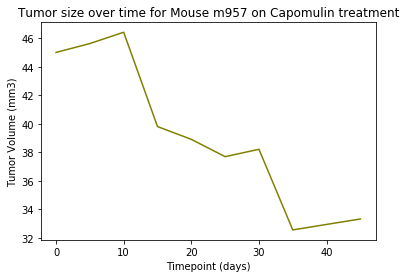

In [30]:
# create line plot for m957
mouse_id = "m957"
m957_tumor_volume = m957["Tumor Volume (mm3)"]
m957_timepoint = m957["Timepoint"]
plt.title(f"Tumor size over time for Mouse {mouse_id} on Capomulin treatment")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(m957_timepoint, m957_tumor_volume, color="olive", label="Capomulin")
plt.show()

In [31]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# get average of tumor volume for mice treated with capomulin
Capomulin_grouped_avg = Capomulin.groupby(["Mouse ID"]).mean()
Capomulin_grouped_avg

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


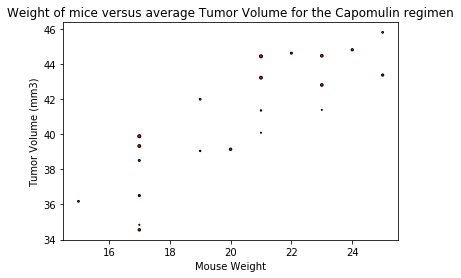

In [37]:
# Create scatter plot of weight vs tumor volume 

Capomulin_avg_tumors = Capomulin_grouped_avg["Tumor Volume (mm3)"]
Capomulin_mice_weight = Capomulin_grouped_avg["Weight (g)"]

plt.scatter(Capomulin_mice_weight, Capomulin_avg_tumors, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=1)
plt.title("Weight of mice versus average Tumor Volume for the Capomulin regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [33]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(Capomulin_mice_weight,Capomulin_avg_tumors)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


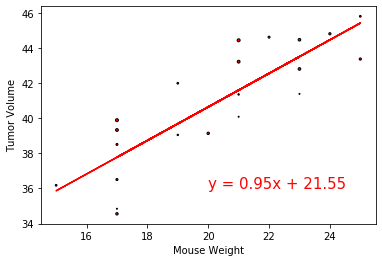

The linear regression equation is: y = 0.95x + 21.55


In [38]:
#Calculate the linear regression model between mouse weight and average tumor volume for the Capomulin treatment. 
# Plot the linear regression model on top of the previous scatter plot.

x_values = Capomulin_mice_weight
y_values = Capomulin_avg_tumors
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Capomulin_mice_weight, Capomulin_avg_tumors, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.show()
print(f'The linear regression equation is: {line_eq}')